In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [38]:
data = pd.read_csv('D:\Leaf Dataset workspace\plantdisease\PlantVillage\PepperBell.csv')
data.columns

Index(['Link to image', 'Diseased'], dtype='object')

In [39]:
images = []
for i in tqdm(range(data.shape[0])):
    img = image.load_img(data['Link to image'][i], target_size=(28,28,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    images.append(img)
X = np.array(images)

100%|█████████████████████████████████████████████████████████████████████████████| 2475/2475 [00:21<00:00, 115.35it/s]


In [40]:
y_bak = y = data['Diseased'].values
y = to_categorical(y)

In [41]:
X_train, X_test, y_train, y_test_bak = train_test_split(X, y, random_state=42, test_size=0.25)
X_train_bak, X_test_bak, y_train_bak, y_test = train_test_split(X, y_bak, random_state=42, test_size=0.25)

In [42]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [43]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1856/1856 [==============================] - ETA: 52s - loss: 0.7139 - acc: 0.28 - ETA: 29s - loss: 0.8536 - acc: 0.45 - ETA: 21s - loss: 0.7857 - acc: 0.51 - ETA: 17s - loss: 0.7594 - acc: 0.53 - ETA: 14s - loss: 0.7496 - acc: 0.51 - ETA: 13s - loss: 0.7333 - acc: 0.55 - ETA: 11s - loss: 0.7167 - acc: 0.56 - ETA: 11s - loss: 0.7064 - acc: 0.58 - ETA: 10s - loss: 0.6947 - acc: 0.61 - ETA: 9s - loss: 0.6812 - acc: 0.6312 - ETA: 9s - loss: 0.6771 - acc: 0.627 - ETA: 8s - loss: 0.6714 - acc: 0.625 - ETA: 8s - loss: 0.6645 - acc: 0.634 - ETA: 7s - loss: 0.6637 - acc: 0.636 - ETA: 7s - loss: 0.6614 - acc: 0.637 - ETA: 7s - loss: 0.6603 - acc: 0.638 - ETA: 6s - loss: 0.6538 - acc: 0.645 - ETA: 6s - loss: 0.6445 - acc: 0.656 - ETA: 6s - loss: 0.6388 - acc: 0.661 - ETA: 6s - loss: 0.6340 - acc: 0.665 - ETA: 5s - loss: 0.6316 - acc: 0.665 - ETA: 5s - loss: 0.6240 - acc: 0.671 - ETA: 5s - loss: 0.6148 - acc: 0.676 - ETA: 5s - loss: 0.6074 - acc: 0.681 - ETA: 4s - loss: 0.6047 - acc: 0

1856/1856 [==============================] - ETA: 6s - loss: 0.1501 - acc: 0.937 - ETA: 7s - loss: 0.1372 - acc: 0.953 - ETA: 7s - loss: 0.1719 - acc: 0.916 - ETA: 7s - loss: 0.1876 - acc: 0.898 - ETA: 7s - loss: 0.2414 - acc: 0.875 - ETA: 6s - loss: 0.2198 - acc: 0.890 - ETA: 6s - loss: 0.2221 - acc: 0.888 - ETA: 6s - loss: 0.2493 - acc: 0.878 - ETA: 6s - loss: 0.2527 - acc: 0.875 - ETA: 6s - loss: 0.2399 - acc: 0.881 - ETA: 6s - loss: 0.2371 - acc: 0.886 - ETA: 5s - loss: 0.2435 - acc: 0.882 - ETA: 5s - loss: 0.2362 - acc: 0.887 - ETA: 5s - loss: 0.2320 - acc: 0.890 - ETA: 5s - loss: 0.2239 - acc: 0.897 - ETA: 5s - loss: 0.2177 - acc: 0.900 - ETA: 5s - loss: 0.2197 - acc: 0.898 - ETA: 5s - loss: 0.2164 - acc: 0.899 - ETA: 4s - loss: 0.2180 - acc: 0.899 - ETA: 4s - loss: 0.2206 - acc: 0.896 - ETA: 4s - loss: 0.2183 - acc: 0.898 - ETA: 4s - loss: 0.2146 - acc: 0.902 - ETA: 4s - loss: 0.2134 - acc: 0.903 - ETA: 4s - loss: 0.2119 - acc: 0.904 - ETA: 4s - loss: 0.2129 - acc: 0.905 - ETA: 

1856/1856 [==============================] - ETA: 7s - loss: 0.0949 - acc: 0.937 - ETA: 7s - loss: 0.2401 - acc: 0.890 - ETA: 6s - loss: 0.2054 - acc: 0.906 - ETA: 6s - loss: 0.1864 - acc: 0.921 - ETA: 6s - loss: 0.1535 - acc: 0.937 - ETA: 6s - loss: 0.1482 - acc: 0.937 - ETA: 6s - loss: 0.1323 - acc: 0.946 - ETA: 6s - loss: 0.1254 - acc: 0.953 - ETA: 5s - loss: 0.1179 - acc: 0.958 - ETA: 5s - loss: 0.1266 - acc: 0.959 - ETA: 5s - loss: 0.1207 - acc: 0.960 - ETA: 5s - loss: 0.1144 - acc: 0.963 - ETA: 5s - loss: 0.1089 - acc: 0.966 - ETA: 5s - loss: 0.1101 - acc: 0.966 - ETA: 5s - loss: 0.1039 - acc: 0.968 - ETA: 5s - loss: 0.1020 - acc: 0.968 - ETA: 4s - loss: 0.1008 - acc: 0.966 - ETA: 4s - loss: 0.1010 - acc: 0.963 - ETA: 4s - loss: 0.1023 - acc: 0.962 - ETA: 4s - loss: 0.1064 - acc: 0.959 - ETA: 4s - loss: 0.1058 - acc: 0.959 - ETA: 4s - loss: 0.1213 - acc: 0.954 - ETA: 4s - loss: 0.1183 - acc: 0.956 - ETA: 4s - loss: 0.1187 - acc: 0.957 - ETA: 4s - loss: 0.1214 - acc: 0.953 - ETA: 

1856/1856 [==============================] - ETA: 9s - loss: 0.0105 - acc: 1.000 - ETA: 8s - loss: 0.0317 - acc: 1.000 - ETA: 7s - loss: 0.0376 - acc: 1.000 - ETA: 7s - loss: 0.0434 - acc: 1.000 - ETA: 6s - loss: 0.0595 - acc: 0.993 - ETA: 6s - loss: 0.0608 - acc: 0.989 - ETA: 6s - loss: 0.0570 - acc: 0.991 - ETA: 6s - loss: 0.0630 - acc: 0.992 - ETA: 6s - loss: 0.0612 - acc: 0.993 - ETA: 6s - loss: 0.0629 - acc: 0.987 - ETA: 6s - loss: 0.0617 - acc: 0.988 - ETA: 6s - loss: 0.0574 - acc: 0.989 - ETA: 5s - loss: 0.0569 - acc: 0.990 - ETA: 5s - loss: 0.0547 - acc: 0.991 - ETA: 5s - loss: 0.0545 - acc: 0.989 - ETA: 5s - loss: 0.0518 - acc: 0.990 - ETA: 5s - loss: 0.0520 - acc: 0.990 - ETA: 5s - loss: 0.0524 - acc: 0.991 - ETA: 5s - loss: 0.0510 - acc: 0.991 - ETA: 4s - loss: 0.0538 - acc: 0.989 - ETA: 4s - loss: 0.0524 - acc: 0.989 - ETA: 4s - loss: 0.0546 - acc: 0.988 - ETA: 4s - loss: 0.0535 - acc: 0.989 - ETA: 4s - loss: 0.0543 - acc: 0.988 - ETA: 4s - loss: 0.0530 - acc: 0.988 - ETA: 

In [44]:
prediction = model.predict_classes(X_test)

In [45]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, prediction) * 100
print('Prediction accuracy = {0:0.3f}%'.format(score))

Prediction accuracy = 94.346%


In [47]:
test_preds = model.predict_classes(Z)

In [48]:
import os
preds = []
for file in os.listdir('D:\Leaf Dataset workspace\plantdisease\PlantVillage\Pepper__bell___test'):
    img = image.load_img('D:/Leaf Dataset workspace/plantdisease/PlantVillage/Pepper__bell___test/'+file, target_size=(28,28,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    preds.append(img)
Z = np.array(preds)

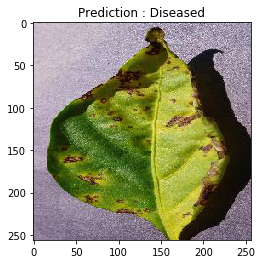

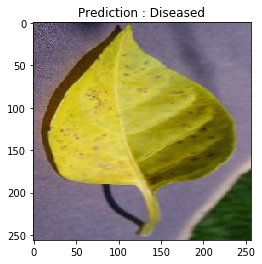

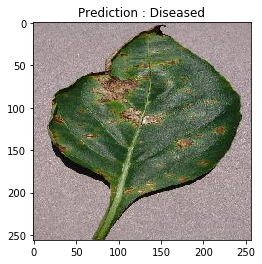

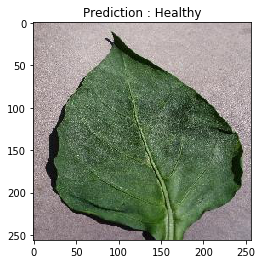

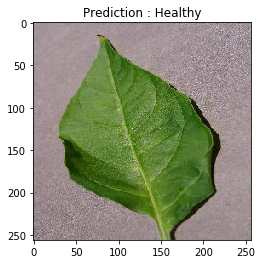

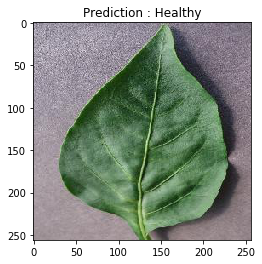

In [55]:
i=0
for file in os.listdir('D:\Leaf Dataset workspace\plantdisease\PlantVillage\Pepper__bell___test'):
    img = plt.imread('D:/Leaf Dataset workspace/plantdisease/PlantVillage/Pepper__bell___test/'+file)
    
    if(test_preds[i]==1):
        res = 'Diseased'
    else:
        res = 'Healthy'
    plt.figure()
    plt.title('Prediction : '+res)
    plt.imshow(img)
    i+=1